In [11]:
# Import das Bibliotecas

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from prettytable import PrettyTable
import plotly.graph_objects as go
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Função para leitura dos arquivos
def ler_arquivo(caminho_arquivo):
    try:
        if caminho_arquivo.endswith('.csv'):
            # Especifique a codificação ao ler o arquivo CSV
            leitor_csv = pd.read_csv(caminho_arquivo, encoding='utf-8')
            return leitor_csv
        elif caminho_arquivo.endswith('.xlsx'):
            conteudo_xlsx = pd.read_excel(caminho_arquivo)
            return conteudo_xlsx
        else:
            with open(caminho_arquivo, 'r') as arquivo:
                conteudo = arquivo.read()
            return conteudo
    except FileNotFoundError:
        return f"O arquivo '{caminho_arquivo}' não foi encontrado."
    except Exception as e:
        return f"Ocorreu um erro ao ler o arquivo: {e}"

# Exemplo de uso para CSV
caminho_csv = './datasets/churn-bigml-80.csv'

In [13]:
df = ler_arquivo(caminho_csv)

In [14]:
# Ler as primeiras linhas dataset

df.head(5)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [16]:
# Verificar se ha dados duplicados dataset

print(f'Ha dados duplicados no dataset: \n {df[df.duplicated()]}')

Ha dados duplicados no dataset: 
 Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []


In [17]:
# Verificando se ha valores ausentes no dataset

table = PrettyTable()

table.field_names = ['Nome_Coluna', 'Tipo_Dados', '%Valores_Missing']

for column in df.columns:
  tipo_dados = str(df[column].dtype)
  valores_missing = 100-df[column].count()/ df.shape[0]*100

  table.add_row([column, tipo_dados, valores_missing])

print(table)

+------------------------+------------+------------------+
|      Nome_Coluna       | Tipo_Dados | %Valores_Missing |
+------------------------+------------+------------------+
|         State          |   object   |       0.0        |
|     Account length     |   int64    |       0.0        |
|       Area code        |   int64    |       0.0        |
|   International plan   |   object   |       0.0        |
|    Voice mail plan     |   object   |       0.0        |
| Number vmail messages  |   int64    |       0.0        |
|   Total day minutes    |  float64   |       0.0        |
|    Total day calls     |   int64    |       0.0        |
|    Total day charge    |  float64   |       0.0        |
|   Total eve minutes    |  float64   |       0.0        |
|    Total eve calls     |   int64    |       0.0        |
|    Total eve charge    |  float64   |       0.0        |
|  Total night minutes   |  float64   |       0.0        |
|   Total night calls    |   int64    |       0.0       

In [18]:
# Descritivo do dataset colunas categoricas

for col in df.select_dtypes(include=['object']).columns:
    print(f'\nContagem de valores únicos para {col}:\n{df[col].value_counts()}')


Contagem de valores únicos para State:
State
WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: count, dtype: int64

Contagem de valores únicos para International plan:
International plan
No     2396
Yes     270
Name: count, dtype: int64

Contagem de valores únicos para Voice mail plan:
Voice mail plan
No     1933
Yes     733
Name: count, dtype: int64


In [19]:
# Descritivo para as variaveis Numericas

df.describe(include=[float, int])

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


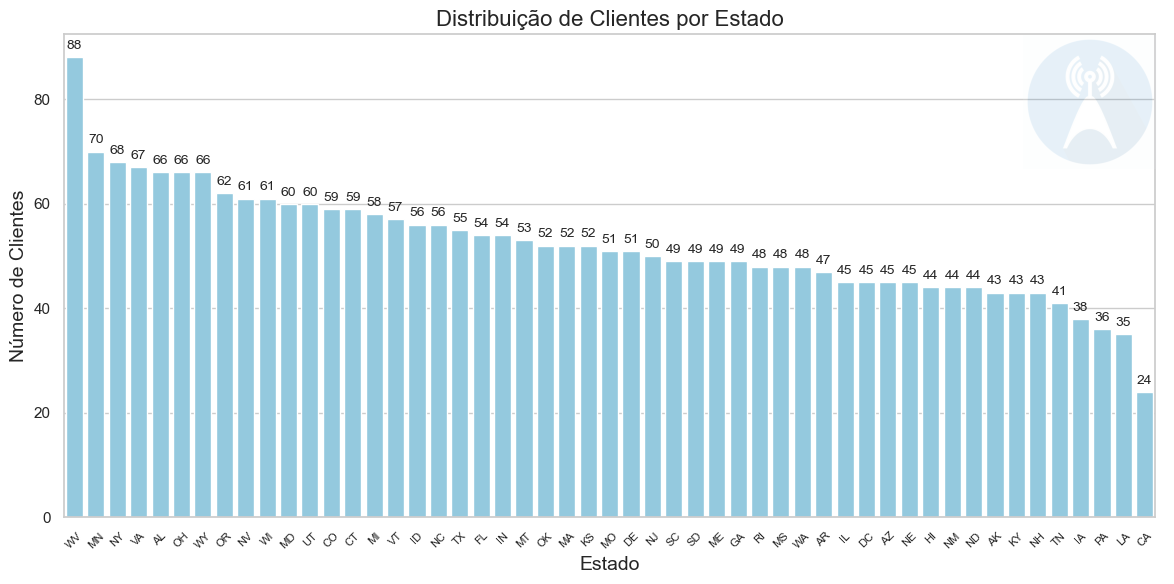

In [20]:
# Clientes por state

state_counts = df['State'].value_counts()

# Configuração do estilo do Seaborn
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=state_counts.index, y=state_counts.values, color='skyblue')

# Adicionando rótulos nas barras
for index, value in enumerate(state_counts.values):
    bar_plot.text(index, value + 1, str(value), ha='center', va='bottom', fontsize=10)

# Adicionando título e rótulos nos eixos
plt.title('Distribuição de Clientes por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=14)
plt.xticks(rotation=45, fontsize=8)

# Adicionando imagem
img_path = 'datasets/img_telecom.jpg'  # Substitua com o caminho da sua imagem
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.05, resample=True, clip_path=None, clip_box=None, alpha=0.1)
ab = AnnotationBbox(imagebox, (0.94, 0.86), frameon=False, pad=0.5, xycoords='axes fraction')
bar_plot.axes.add_artist(ab)

# Ajustando o layout para evitar corte dos rótulos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

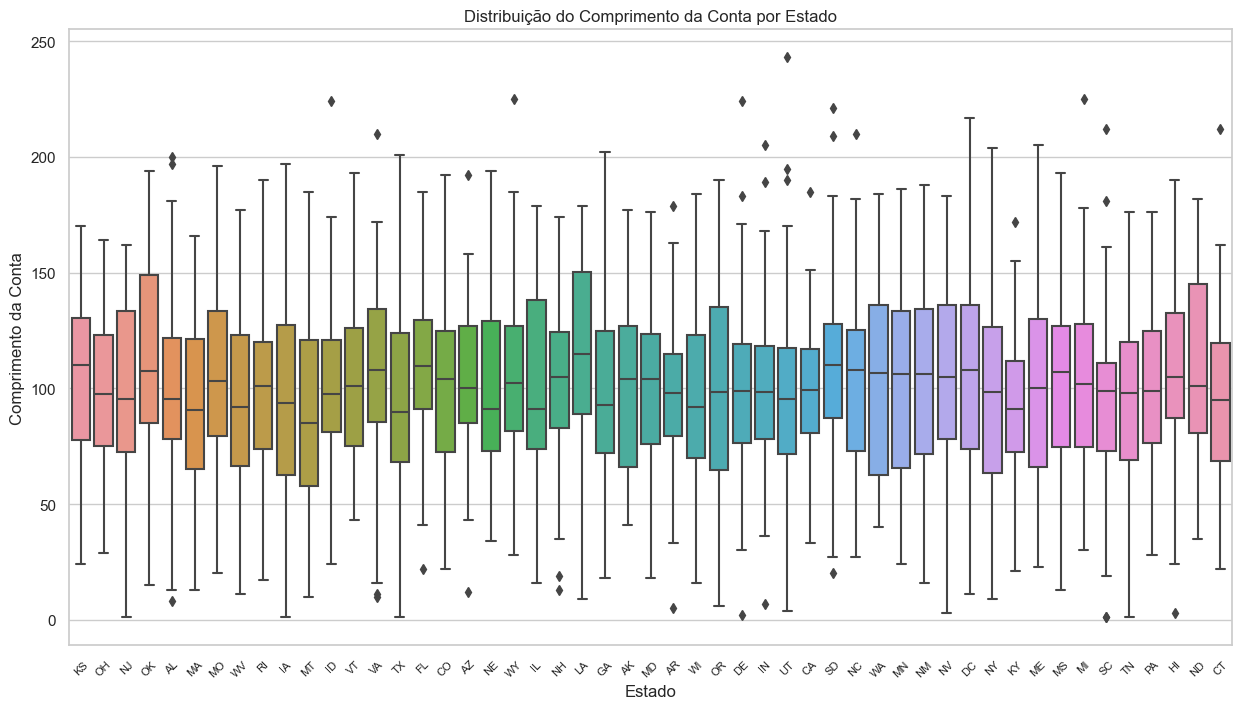

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='State', y='Account length', data=df)
plt.title('Distribuição do Comprimento da Conta por Estado')
plt.xlabel('Estado')
plt.ylabel('Comprimento da Conta')
plt.xticks(rotation=45, fontsize=8)
plt.show()

In [22]:
# Como o comportamento dos clientes varia entre aqueles com e sem plano internacional?

with_plan = df[df['International plan'] == 'Yes']
without_plan = df[df['International plan'] == 'No']



# Estatísticas para clientes com plano internacional
with_plan_stats = with_plan[['Total day minutes', 'Total day calls', 'Total day charge']].mean()

# Estatísticas para clientes sem plano internacional
without_plan_stats = without_plan[['Total day minutes', 'Total day calls', 'Total day charge']].mean()

# Criando tabelas PrettyTable
with_plan_table = PrettyTable()
with_plan_table.field_names = with_plan_stats.index
with_plan_table.add_row(with_plan_stats)

without_plan_table = PrettyTable()
without_plan_table.field_names = without_plan_stats.index
without_plan_table.add_row(without_plan_stats)

# Imprimindo as tabelas
print("Estatísticas para clientes com plano internacional:")
print(with_plan_table)

print("\nEstatísticas para clientes sem plano internacional:")
print(without_plan_table)



Estatísticas para clientes com plano internacional:
+--------------------+--------------------+--------------------+
| Total day minutes  |  Total day calls   |  Total day charge  |
+--------------------+--------------------+--------------------+
| 187.48185185185187 | 100.05555555555556 | 31.872592592592593 |
+--------------------+--------------------+--------------------+

Estatísticas para clientes sem plano internacional:
+--------------------+------------------+--------------------+
| Total day minutes  | Total day calls  |  Total day charge  |
+--------------------+------------------+--------------------+
| 178.58009181969948 | 100.338898163606 | 30.359127712854757 |
+--------------------+------------------+--------------------+


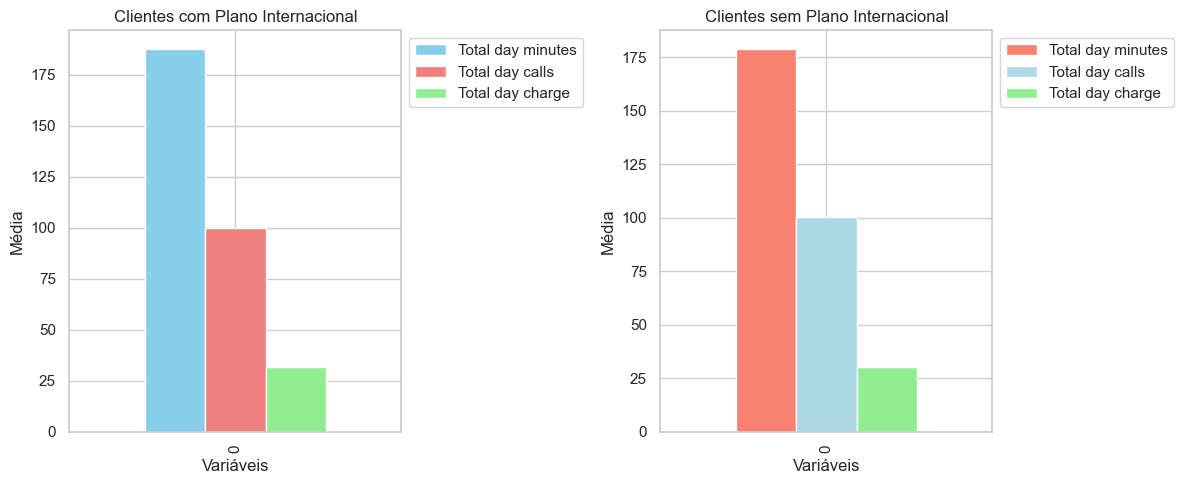

In [23]:
# Convertendo as estatísticas para DataFrame para facilitar o plot
with_plan_df = pd.DataFrame(with_plan_stats).transpose()
without_plan_df = pd.DataFrame(without_plan_stats).transpose()

# Criando subplots lado a lado com cores diferentes
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Cores para as barras
colors_with_plan = ['skyblue', 'lightcoral', 'lightgreen']
colors_without_plan = ['salmon', 'lightblue', 'lightgreen']

# Plotando o primeiro subplot (Clientes com plano internacional)
with_plan_df.plot(kind='bar', color=colors_with_plan, ax=axs[0], width=0.6)
axs[0].set_title('Clientes com Plano Internacional')
axs[0].set_xlabel('Variáveis')
axs[0].set_ylabel('Média')

# Plotando o segundo subplot (Clientes sem plano internacional)
without_plan_df.plot(kind='bar', color=colors_without_plan, ax=axs[1], width=0.6)
axs[1].set_title('Clientes sem Plano Internacional')
axs[1].set_xlabel('Variáveis')
axs[1].set_ylabel('Média')

# Adicionando legendas
axs[0].legend(with_plan_stats.index, loc='upper left', bbox_to_anchor=(1, 1))
axs[1].legend(without_plan_stats.index, loc='upper left', bbox_to_anchor=(1, 1))

# Ajustando o layout
plt.tight_layout()
plt.show()

Estatísticas para clientes com plano de correio de voz:
       Total day minutes  Total eve minutes  Total night minutes  \
count         733.000000         733.000000           733.000000   
mean          180.664393         201.968895           201.256753   
std            52.897757          50.810976            51.939453   
min             2.600000          42.200000            50.100000   
25%           145.000000         165.800000           164.800000   
50%           183.100000         203.700000           201.800000   
75%           218.200000         236.300000           237.500000   
max           322.400000         348.500000           381.900000   

       Total intl minutes  
count          733.000000  
mean            10.173806  
std              2.783985  
min              0.000000  
25%              8.300000  
50%             10.100000  
75%             12.000000  
max             20.000000  

Estatísticas para clientes sem plano de correio de voz:
       Total day minut

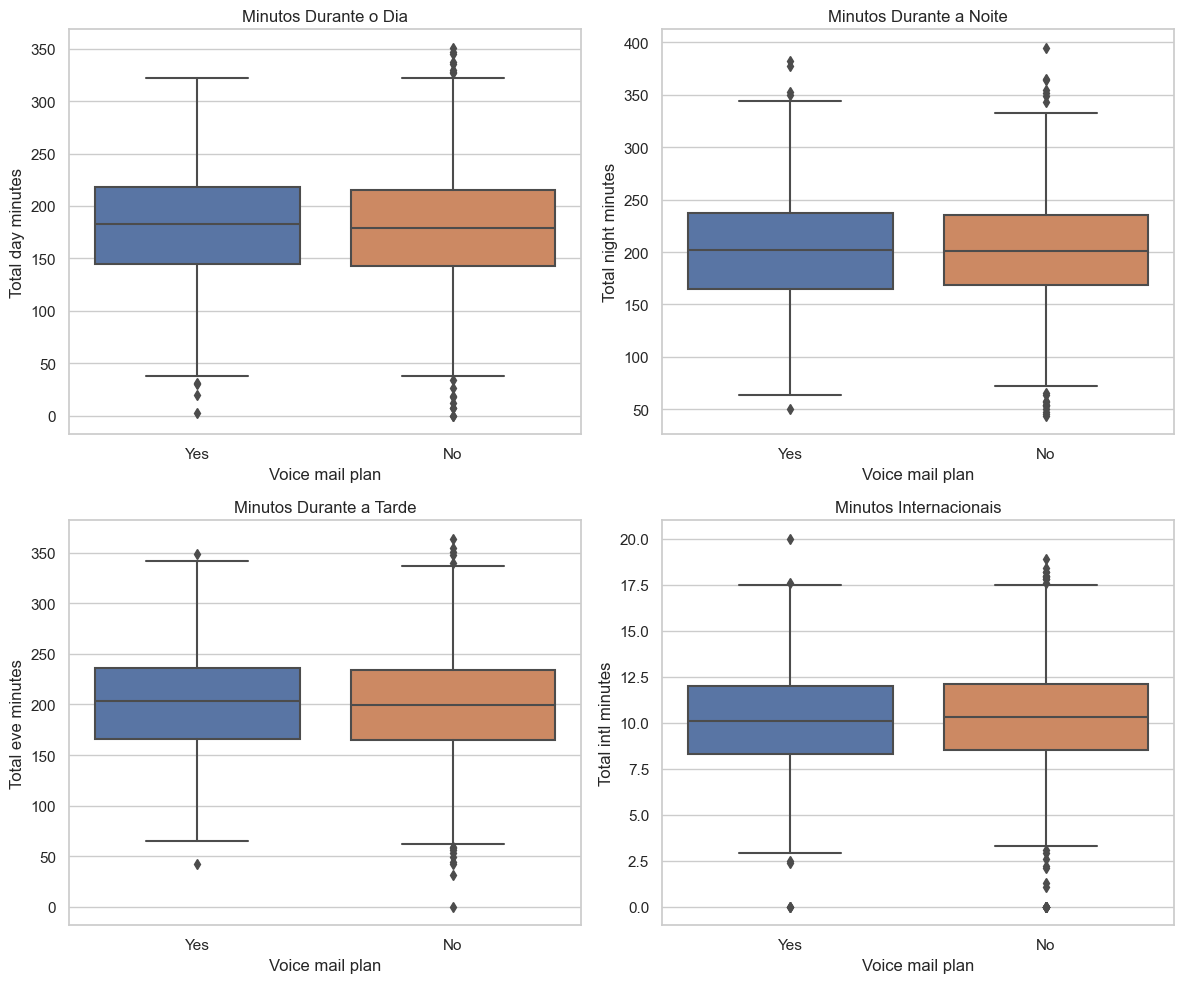

In [24]:
# Existe uma diferença no uso de serviços entre clientes com e sem plano de correio de voz?

# Separar os dados em dois grupos: com plano de correio de voz (Yes) e sem plano de correio de voz (No)
with_voice_mail_plan = df[df['Voice mail plan'] == 'Yes']
without_voice_mail_plan = df[df['Voice mail plan'] == 'No']

# Comparar estatísticas descritivas para variáveis relevantes
with_voice_mail_stats = with_voice_mail_plan[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']].describe()
without_voice_mail_stats = without_voice_mail_plan[['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']].describe()

# Imprimir estatísticas
print("Estatísticas para clientes com plano de correio de voz:")
print(with_voice_mail_stats)

print("\nEstatísticas para clientes sem plano de correio de voz:")
print(without_voice_mail_stats)

# Plotar gráficos comparativos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico de caixa para minutos durante o dia
sns.boxplot(x='Voice mail plan', y='Total day minutes', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Minutos Durante o Dia')

# Gráfico de caixa para minutos durante a noite
sns.boxplot(x='Voice mail plan', y='Total night minutes', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Minutos Durante a Noite')

# Gráfico de caixa para minutos durante a tarde
sns.boxplot(x='Voice mail plan', y='Total eve minutes', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Minutos Durante a Tarde')

# Gráfico de caixa para minutos internacionais
sns.boxplot(x='Voice mail plan', y='Total intl minutes', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Minutos Internacionais')

# Ajustando o layout
plt.tight_layout()
plt.show()

In [25]:
# Qual é a relação entre o número de chamadas para o serviço de atendimento ao cliente e a satisfação do cliente?

# Estatísticas descritivas para o número de chamadas ao serviço de atendimento ao cliente
customer_service_stats = df.groupby('Churn')['Customer service calls'].describe()

# Imprimir estatísticas
print(customer_service_stats)

        count      mean       std  min  25%  50%  75%  max
Churn                                                     
False  2278.0  1.453029  1.152125  0.0  1.0  1.0  2.0  7.0
True    388.0  2.206186  1.882536  0.0  1.0  2.0  4.0  9.0


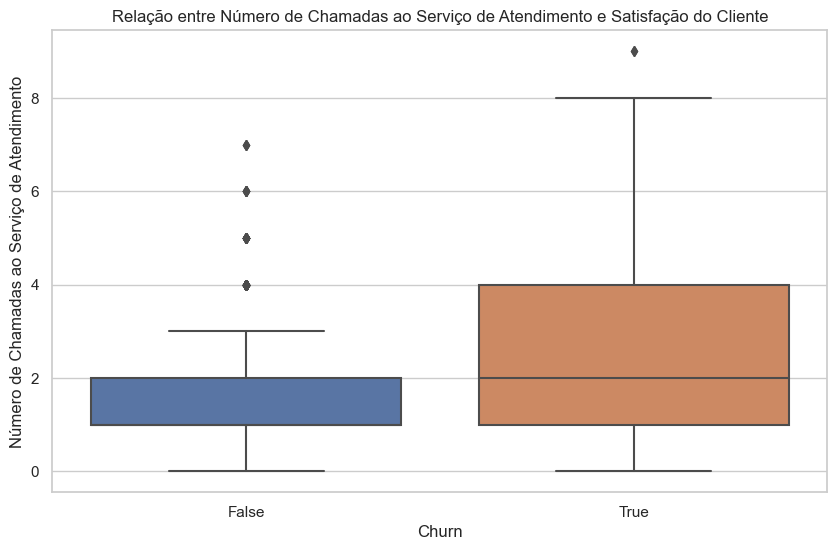

In [26]:
# Boxplot para comparar a distribuição
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Customer service calls', data=df)
plt.title('Relação entre Número de Chamadas ao Serviço de Atendimento e Satisfação do Cliente')
plt.xlabel('Churn')
plt.ylabel('Número de Chamadas ao Serviço de Atendimento')
plt.show()

In [27]:
# Calcular matriz de correlação
correlation_matrix = df[['Customer service calls', 'Churn']].corr()

# Imprimir matriz de correlação
print(correlation_matrix)

                        Customer service calls    Churn
Customer service calls                 1.00000  0.20259
Churn                                  0.20259  1.00000


### A correlação entre o número de chamadas para o serviço de atendimento ao cliente e a variável "Churn" é aproximadamente 0.20259.
### A correlação positiva sugere que há uma relação positiva fraca entre o número de chamadas para o serviço de atendimento ao cliente e a probabilidade de churn. Ou seja, clientes que fazem mais chamadas ao serviço de atendimento ao cliente tendem a ter uma probabilidade ligeiramente maior de churn.

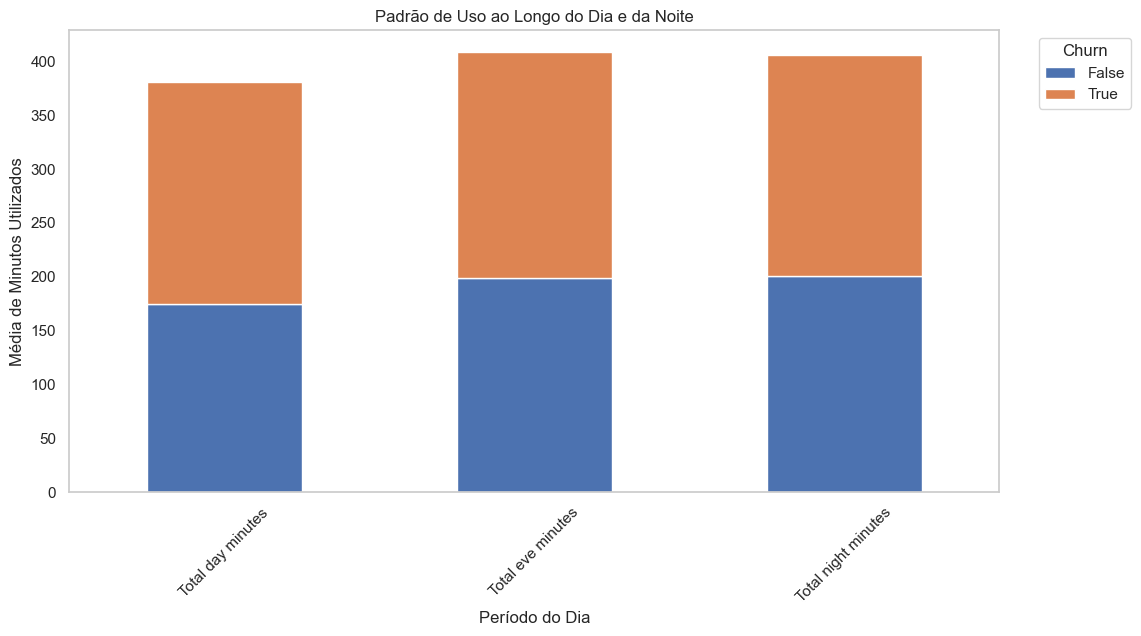

In [28]:
# padrão de uso varia ao longo do dia e da noite?

# Agrupar dados por períodos do dia e calcular a média dos minutos utilizados
usage_pattern = df.groupby('Churn')[['Total day minutes', 'Total eve minutes', 'Total night minutes']].mean()

# Plotar gráfico de barras empilhadas
usage_pattern.transpose().plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Padrão de Uso ao Longo do Dia e da Noite')
plt.xlabel('Período do Dia')
plt.ylabel('Média de Minutos Utilizados')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(title='Churn', loc='upper right',  bbox_to_anchor=(1.15, 1))
plt.show()

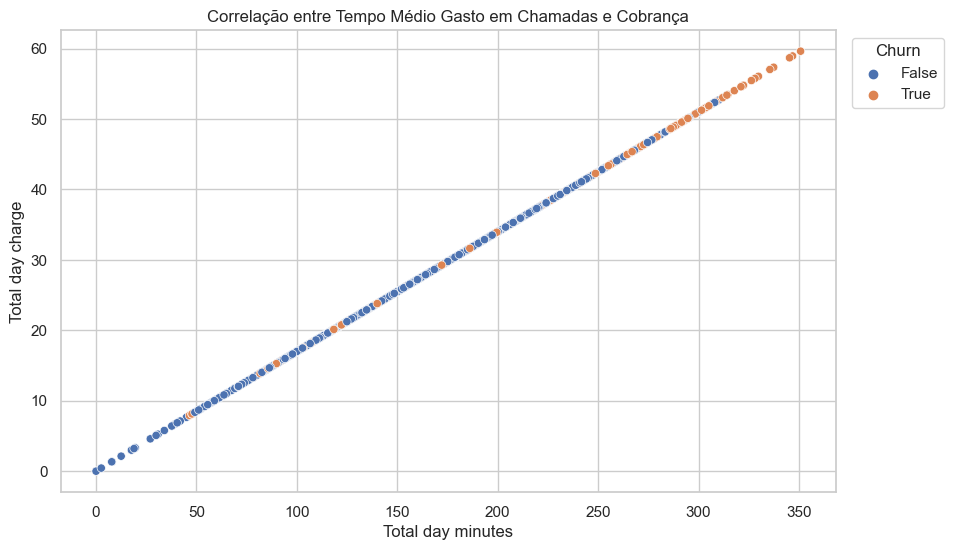

In [29]:
# Correlação entre o Tempo Médio Gasto em Chamadas e a Cobrança

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total day minutes', y='Total day charge', hue='Churn', data=df)
plt.title('Correlação entre Tempo Médio Gasto em Chamadas e Cobrança')
plt.xlabel('Total day minutes')
plt.ylabel('Total day charge')
plt.legend(title='Churn', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.show()

In [30]:
# Existe uma correlação entre o comprimento da conta e a satisfação do cliente?

# Calcular a correlação entre o comprimento da conta e a satisfação do cliente
correlation_length_churn = df[['Account length', 'Churn']].corr()

# Imprimir a matriz de correlação
print(correlation_length_churn)

                Account length     Churn
Account length        1.000000  0.017728
Churn                 0.017728  1.000000


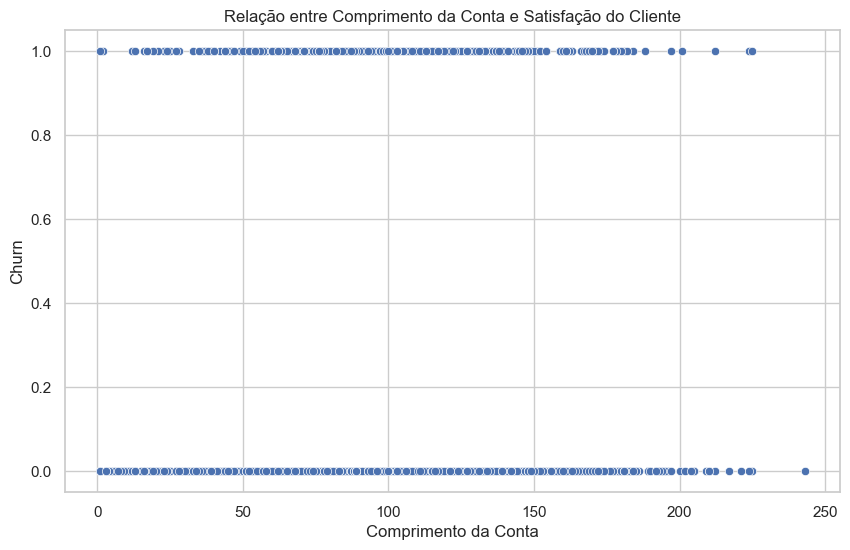

In [31]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Account length', y='Churn', data=df)
plt.title('Relação entre Comprimento da Conta e Satisfação do Cliente')
plt.xlabel('Comprimento da Conta')
plt.ylabel('Churn')
plt.show()

In [32]:
# A utilização de correio de voz está relacionada ao número de chamadas para o serviço de atendimento ao cliente?

# Agrupar por "Voice mail plan" e calcular a média do número de chamadas para o serviço de atendimento ao cliente
service_calls_by_voice_mail = df.groupby('Voice mail plan')['Customer service calls'].mean()

# Imprimir médias
print(service_calls_by_voice_mail)


Voice mail plan
No     1.580445
Yes    1.515689
Name: Customer service calls, dtype: float64


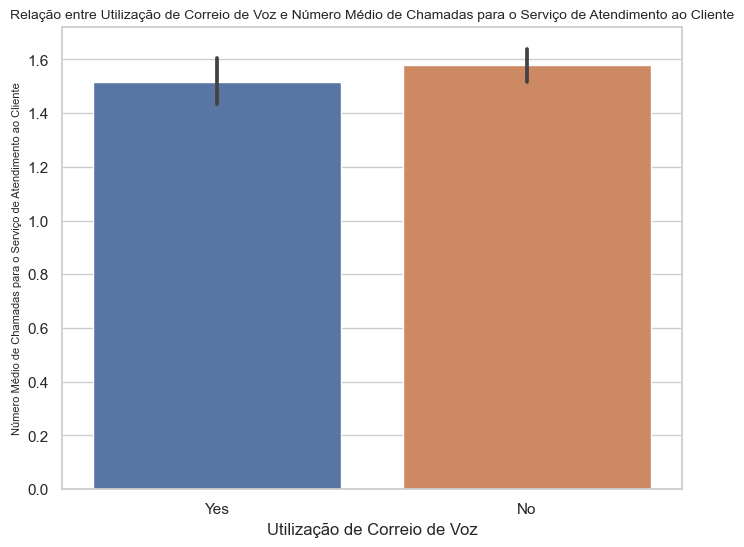

In [33]:
# Gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x='Voice mail plan', y='Customer service calls', data=df)
plt.title('Relação entre Utilização de Correio de Voz e Número Médio de Chamadas para o Serviço de Atendimento ao Cliente', fontsize=10)
plt.xlabel('Utilização de Correio de Voz')
plt.ylabel('Número Médio de Chamadas para o Serviço de Atendimento ao Cliente', fontsize=8)
plt.show()

In [34]:
# Teste Estatistico

from scipy.stats import ttest_ind

# Dividir os dados em dois grupos: com correio de voz e sem correio de voz
with_voice_mail = df[df['Voice mail plan'] == 'Yes']['Customer service calls']
without_voice_mail = df[df['Voice mail plan'] == 'No']['Customer service calls']

# Teste t de Student para comparar as médias
t_statistic, p_value = ttest_ind(with_voice_mail, without_voice_mail)
print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

Test Statistic: -1.1385730867649286
P-value: 0.2549836360146759


Test Statistic (-1.14):

O valor negativo indica que, em média, o grupo com correio de voz tem um número ligeiramente menor de chamadas para o serviço de atendimento ao cliente em comparação com o grupo sem correio de voz.
P-value (0.255):

O valor p é relativamente alto (0.255), indicando que não há evidências estatisticamente significativas para rejeitar a hipótese nula. A hipótese nula geralmente afirma que não há diferença significativa entre os grupos.
Portanto, com base nos resultados do teste, não há evidências suficientes para concluir que a utilização de correio de voz está significativamente relacionada ao número de chamadas para o serviço de atendimento ao cliente.

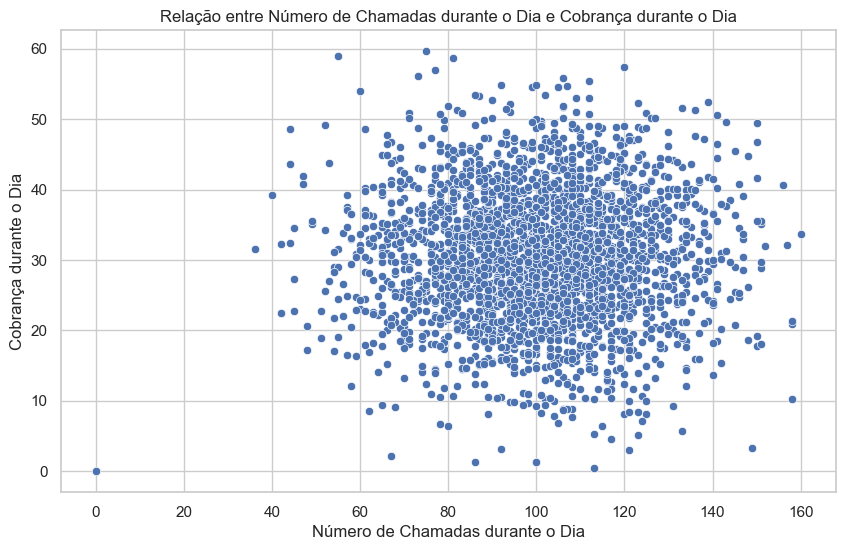

In [35]:
# Há alguma relação entre o número de chamadas durante o dia e a cobrança durante o dia?

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total day calls', y='Total day charge', data=df)
plt.title('Relação entre Número de Chamadas durante o Dia e Cobrança durante o Dia')
plt.xlabel('Número de Chamadas durante o Dia')
plt.ylabel('Cobrança durante o Dia')
plt.show()

In [36]:
# Calcular a correlação
correlation_calls_charge = df[['Total day calls', 'Total day charge']].corr()

# Imprimir a matriz de correlação
print(correlation_calls_charge)

                  Total day calls  Total day charge
Total day calls          1.000000          0.016787
Total day charge         0.016787          1.000000


 a correlação é praticamente insignificante, sugerindo que não há uma relação linear forte entre o número de chamadas durante o dia e a cobrança durante o dia.

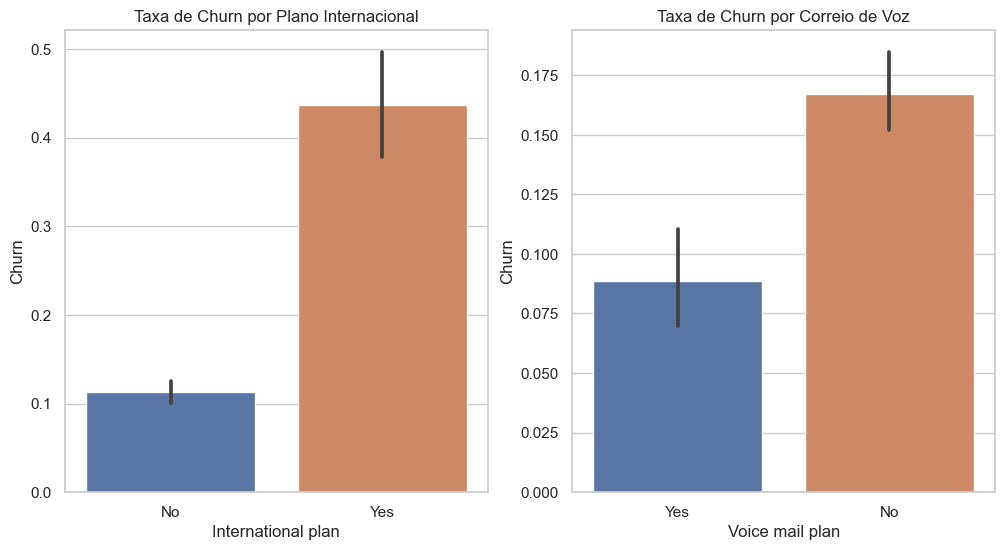

In [37]:
# Como as características dos clientes (como plano internacional, correio de voz) influenciam o churn?

# Tabela de contingência para Plano Internacional vs. Churn
international_plan_churn = pd.crosstab(df['International plan'], df['Churn'], margins=True, normalize='index')

# Tabela de contingência para Correio de Voz vs. Churn
voice_mail_churn = pd.crosstab(df['Voice mail plan'], df['Churn'], margins=True, normalize='index')

# Gráficos de barras empilhadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='International plan', y='Churn', data=df)
plt.title('Taxa de Churn por Plano Internacional')

plt.subplot(1, 2, 2)
sns.barplot(x='Voice mail plan', y='Churn', data=df)
plt.title('Taxa de Churn por Correio de Voz')

plt.show()

In [38]:
from scipy.stats import chi2_contingency

# Teste qui-quadrado para Plano Internacional vs. Churn
chi2_international_plan, p_international_plan, _, _ = chi2_contingency(international_plan_churn.iloc[:-1, :-1])

# Teste qui-quadrado para Correio de Voz vs. Churn
chi2_voice_mail, p_voice_mail, _, _ = chi2_contingency(voice_mail_churn.iloc[:-1, :-1])

print(f'Chi-square test statistics and p-value for International plan vs. Churn:')
print(f'Chi2: {chi2_international_plan}, p-value: {p_international_plan}')

print(f'Chi-square test statistics and p-value for Voice mail plan vs. Churn:')
print(f'Chi2: {chi2_voice_mail}, p-value: {p_voice_mail}')

Chi-square test statistics and p-value for International plan vs. Churn:
Chi2: 0.0, p-value: 1.0
Chi-square test statistics and p-value for Voice mail plan vs. Churn:
Chi2: 0.0, p-value: 1.0


Em termos práticos, isso sugere que a presença ou ausência de um plano internacional e a utilização ou não do correio de voz não estão associadas a diferenças significativas nas taxas de churn. Portanto, a partir desses resultados, não é possível afirmar que essas características específicas dos clientes têm um impacto significativo no churn, com base nos dados disponíveis e no teste qui-quadrado realizado.

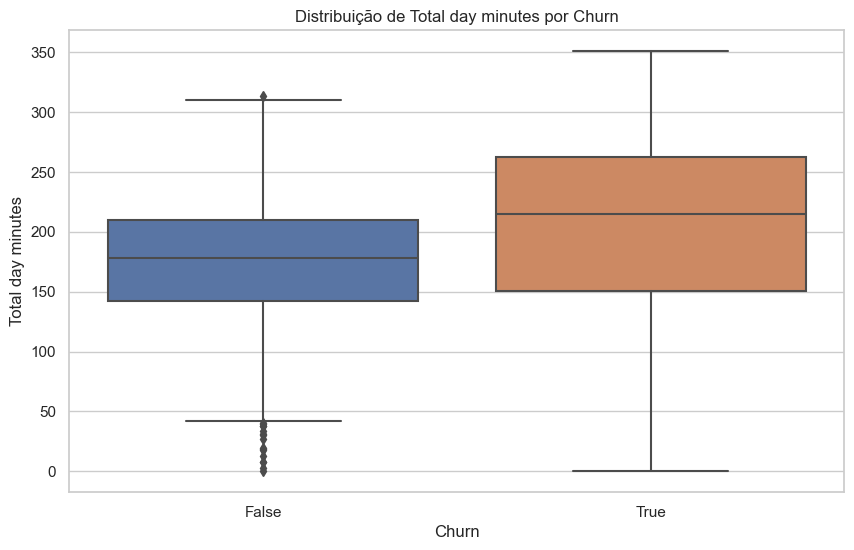

In [39]:
# Boxplot para Total day minutes por Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Total day minutes', data=df)
plt.title('Distribuição de Total day minutes por Churn')
plt.show()

In [40]:
# Como os diferentes planos (internacional, correio de voz) impactam o uso e a satisfação do cliente?

# Estatísticas descritivas para minutos gastos por plano internacional
usage_by_international_plan = df.groupby('International plan')['Total day minutes'].describe()

# Estatísticas descritivas para churn por plano internacional
churn_by_international_plan = df.groupby('International plan')['Churn'].mean()

# Estatísticas descritivas para minutos gastos por correio de voz
usage_by_voice_mail_plan = df.groupby('Voice mail plan')['Total day minutes'].describe()

# Estatísticas descritivas para churn por correio de voz
churn_by_voice_mail_plan = df.groupby('Voice mail plan')['Churn'].mean()

print(usage_by_international_plan)
print(churn_by_international_plan)
print(usage_by_voice_mail_plan)
print(churn_by_voice_mail_plan)

                     count        mean        std   min    25%     50%  \
International plan                                                       
No                  2396.0  178.580092  53.776715   0.0  142.9  179.35   
Yes                  270.0  187.481852  57.403157  12.5  148.2  185.10   

                        75%    max  
International plan                  
No                  214.325  350.8  
Yes                 227.225  346.8  
International plan
No     0.112688
Yes    0.437037
Name: Churn, dtype: float64
                  count        mean        std  min    25%    50%    75%  \
Voice mail plan                                                            
No               1933.0  179.033109  54.706653  0.0  142.9  179.2  214.8   
Yes               733.0  180.664393  52.897757  2.6  145.0  183.1  218.2   

                   max  
Voice mail plan         
No               350.8  
Yes              322.4  
Voice mail plan
No     0.167098
Yes    0.088677
Name: Churn, dtype: flo

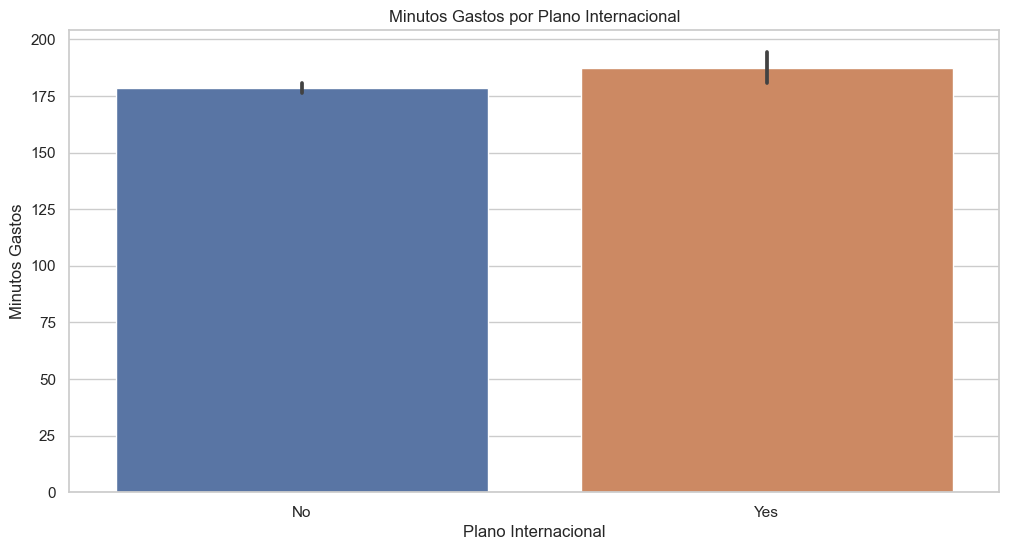

In [41]:
# Gráfico de barras para minutos gastos por plano internacional
plt.figure(figsize=(12, 6))
sns.barplot(x='International plan', y='Total day minutes', data=df)
plt.title('Minutos Gastos por Plano Internacional')
plt.xlabel('Plano Internacional')
plt.ylabel('Minutos Gastos')
plt.show()

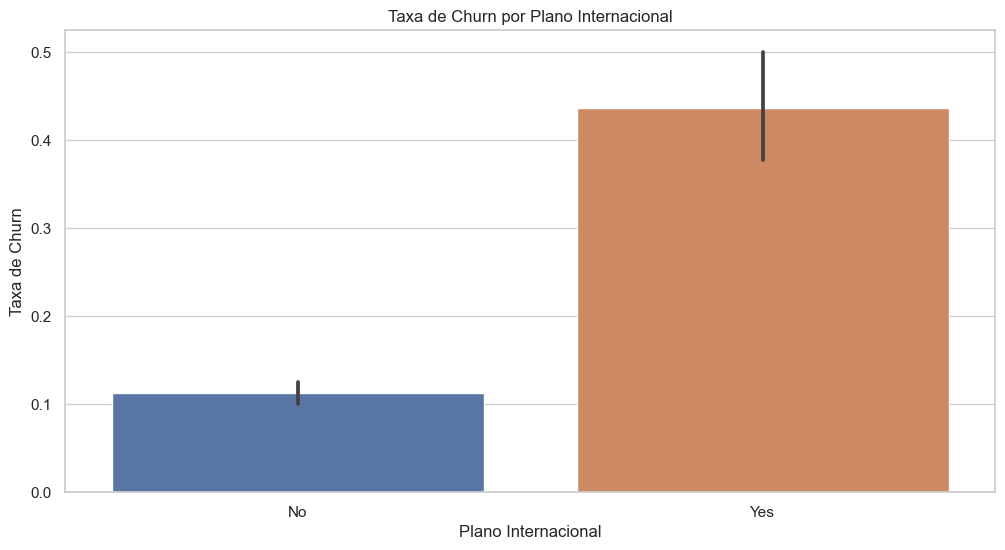

In [42]:
# Gráfico de barras para churn por plano internacional
plt.figure(figsize=(12, 6))
sns.barplot(x='International plan', y='Churn', data=df)
plt.title('Taxa de Churn por Plano Internacional')
plt.xlabel('Plano Internacional')
plt.ylabel('Taxa de Churn')
plt.show()

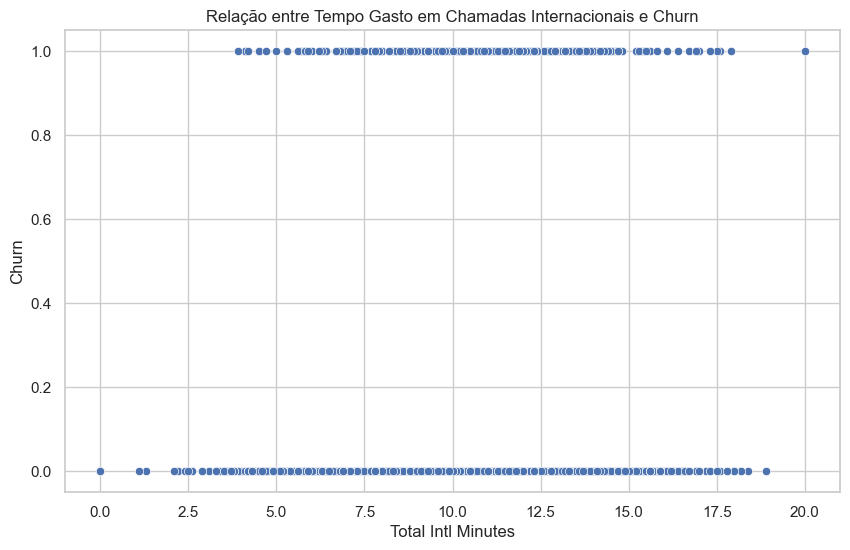

                    Total intl minutes     Churn
Total intl minutes            1.000000  0.086204
Churn                         0.086204  1.000000


In [43]:
# Existe uma relação entre o tempo gasto em chamadas internacionais e a satisfação do cliente?

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total intl minutes', y='Churn', data=df)
plt.title('Relação entre Tempo Gasto em Chamadas Internacionais e Churn')
plt.xlabel('Total Intl Minutes')
plt.ylabel('Churn')
plt.show()

# Calcular correlação
correlation_intl_minutes_churn = df[['Total intl minutes', 'Churn']].corr()
print(correlation_intl_minutes_churn)

A correlação positiva de 0.0862 sugere uma relação muito fraca entre o tempo gasto em chamadas internacionais e a taxa de churn. Isso indica que, em geral, não há uma associação forte entre o tempo gasto em chamadas internacionais e a propensão do cliente a cancelar o serviço.

In [44]:
df1 = df.copy()

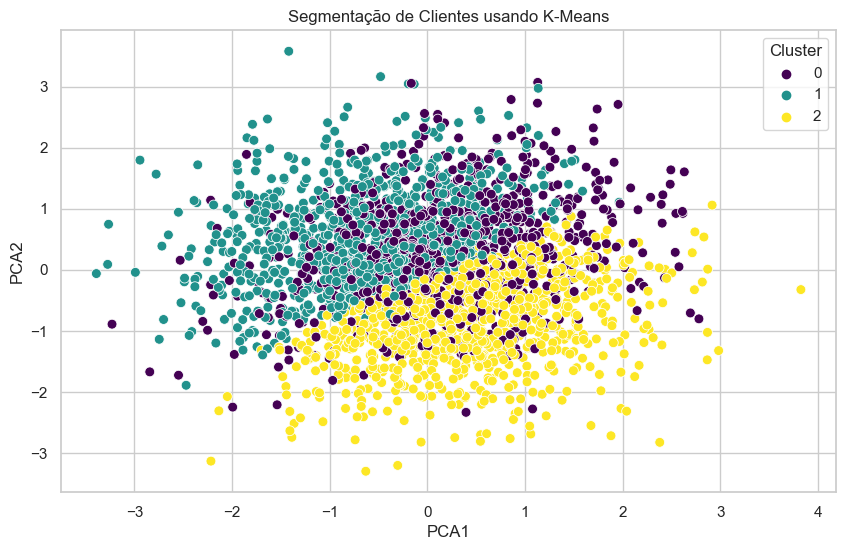

In [45]:
# Segmentaçao dos clientes

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecionar variáveis relevantes para a segmentação
selected_features = ['Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']

# Filtrar o DataFrame para incluir apenas as variáveis selecionadas
data_for_segmentation = df1[selected_features]

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_segmentation)

# Aplicar o algoritmo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_data)

# Reduzir a dimensionalidade para visualização (opcional)
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
df1['PCA1'] = reduced_data[:, 0]
df1['PCA2'] = reduced_data[:, 1]

# Visualizar os clusters no espaço de duas dimensões
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df1, palette='viridis', s=50)
plt.title('Segmentação de Clientes usando K-Means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis numéricas
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

# Criar um objeto StandardScaler
scaler = StandardScaler()

# Aplicar a padronização apenas nas variáveis numéricas
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [47]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,0.692163,-0.527811,No,Yes,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,False
1,OH,0.161278,-0.527811,No,Yes,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,False
2,NJ,0.919686,-0.527811,No,No,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,False
3,OH,-0.420168,-0.692467,Yes,No,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,False
4,OK,-0.647691,-0.527811,Yes,No,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,-0.546569,-0.527811,No,No,-0.589414,-0.826226,-0.115600,-0.826178,-0.209771,-1.588658,-0.210869,0.398478,1.436730,0.397126,0.560644,0.216894,0.565334,0.333610,False
2662,AZ,2.310100,-0.527811,No,Yes,2.055754,-0.429549,-1.166419,-0.430042,0.296687,1.288660,0.297208,1.534958,-0.881087,1.535136,-0.120891,0.624104,-0.125539,0.333610,False
2663,WV,-0.824652,-0.527811,No,No,-0.589414,0.952365,-2.167199,0.952636,-0.922347,-2.233574,-0.922176,-0.194382,1.179195,-0.193763,-0.228501,-0.190317,-0.231828,1.096392,False
2664,RI,-1.835863,1.706797,No,No,-0.589414,0.024324,0.434829,0.024701,1.735580,-2.084747,1.735990,-0.182564,-0.469031,-0.180632,1.385660,0.624104,1.389067,0.333610,False


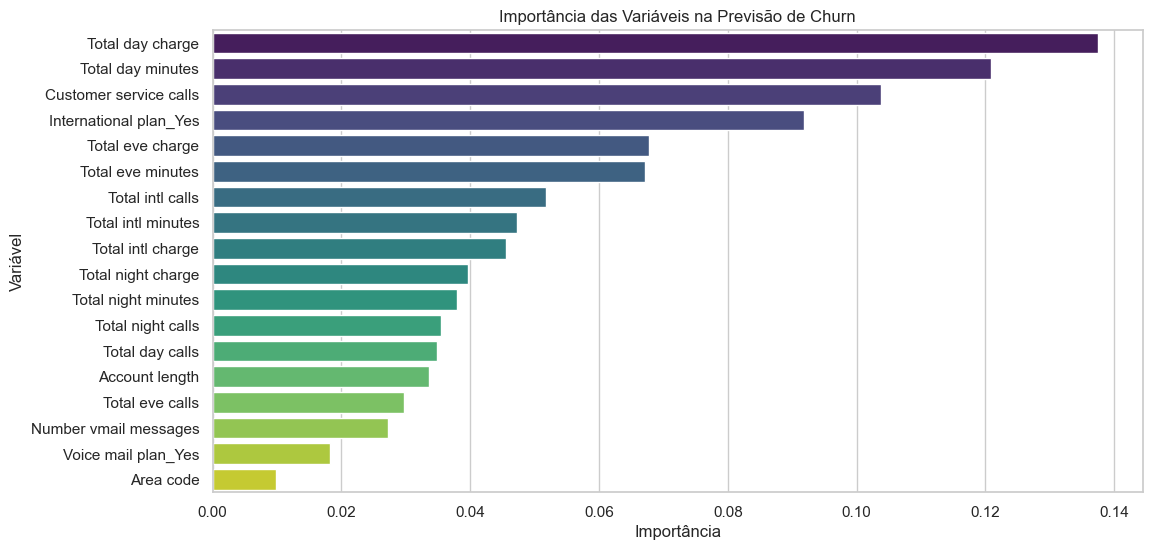

                   Feature  Importance
5         Total day charge    0.137510
3        Total day minutes    0.120850
15  Customer service calls    0.103844
16  International plan_Yes    0.091888
8         Total eve charge    0.067768
6        Total eve minutes    0.067076
13        Total intl calls    0.051770
12      Total intl minutes    0.047199
14       Total intl charge    0.045545
11      Total night charge    0.039633
9      Total night minutes    0.037984
10       Total night calls    0.035483
4          Total day calls    0.034866
0           Account length    0.033555
7          Total eve calls    0.029676
2    Number vmail messages    0.027191
17     Voice mail plan_Yes    0.018260
1                Area code    0.009903


In [48]:
# verificar as variaveis mais importantes do dataset

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Selecionar características para a previsão
features = ['Account length', 'Area code', 'Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls',
            'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge',
            'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls',
            'International plan', 'Voice mail plan','Churn']

# Converter variáveis categóricas em numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['International plan', 'Voice mail plan'], drop_first=True)

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_encoded.drop(['Churn','State'], axis=1)
y = df_encoded['Churn']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Obter importância das variáveis
feature_importance = model.feature_importances_

# Criar um DataFrame com as variáveis e suas importâncias
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Ordenar o DataFrame por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizar as importâncias das variáveis
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Importância das Variáveis na Previsão de Churn')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

# Exibir o DataFrame com as importâncias
print(feature_importance_df)

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Converter variáveis categóricas em numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['International plan', 'Voice mail plan'], drop_first=True)

# Selecionar as variáveis mais importantes
selected_features = feature_importance_df['Feature'].head(10).tolist()

# Filtrar o DataFrame original
df_selected_encoded = df_encoded[selected_features + ['Churn']]

# Separar as variáveis independentes (X) e a variável dependente (y)
X_selected = df_selected_encoded.drop('Churn', axis=1)
y_selected = df_selected_encoded['Churn']

# Dividir o conjunto de dados em treino e teste
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y_selected, test_size=0.2, random_state=42
)

# Definir os modelos e os hiperparâmetros para o Grid Search
models = {
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [3, 5, 7]}),
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [50, 100, 150]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'k-NN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]})
}

# Realizar Grid Search e avaliar os modelos
results = {}
for model_name, (model, params) in models.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train_selected, y_train_selected)
    y_pred_selected = grid_search.predict(X_test_selected)
    
    accuracy = accuracy_score(y_test_selected, y_pred_selected)
    classification_rep = classification_report(y_test_selected, y_pred_selected)
    
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy,
        'Classification Report': classification_rep
    }

# Exibir resultados
for model_name, result in results.items():
    print(f'\n{model_name} Results:')
    print(f'Best Parameters: {result["Best Parameters"]}')
    print(f'Accuracy: {result["Accuracy"]:.2f}')
    print('Classification Report:\n', result['Classification Report'])



Decision Tree Results:
Best Parameters: {'max_depth': 5}
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94       455
        True       0.74      0.53      0.62        79

    accuracy                           0.90       534
   macro avg       0.83      0.75      0.78       534
weighted avg       0.89      0.90      0.90       534


Random Forest Results:
Best Parameters: {'n_estimators': 150}
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.98      0.96       455
        True       0.84      0.68      0.76        79

    accuracy                           0.93       534
   macro avg       0.90      0.83      0.86       534
weighted avg       0.93      0.93      0.93       534


SVM Results:
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   supp


Best Model (Random Forest) Results:
Best Parameters: {'n_estimators': 150}
Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.98      0.96       455
        True       0.82      0.65      0.72        79

    accuracy                           0.93       534
   macro avg       0.88      0.81      0.84       534
weighted avg       0.92      0.93      0.92       534



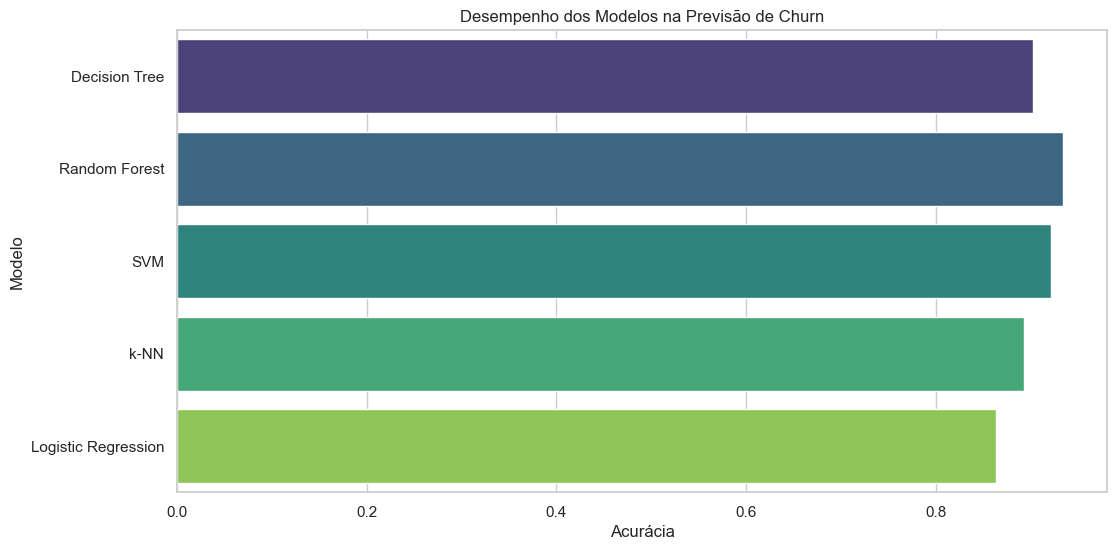

In [50]:
# Identificar o algoritmo com a maior acurácia
best_model_name = max(results, key=lambda x: results[x]['Accuracy'])
best_model_params = results[best_model_name]['Best Parameters']

# Treinar o melhor modelo com os melhores parâmetros
best_model = models[best_model_name][0]
best_model.set_params(**best_model_params)
best_model.fit(X_train_selected, y_train_selected)

# Fazer previsões no conjunto de teste
y_pred_best_model = best_model.predict(X_test_selected)

# Avaliar o desempenho do melhor modelo
accuracy_best_model = accuracy_score(y_test_selected, y_pred_best_model)
classification_rep_best_model = classification_report(y_test_selected, y_pred_best_model)

# Exibir resultados do melhor modelo
print(f'\nBest Model ({best_model_name}) Results:')
print(f'Best Parameters: {best_model_params}')
print(f'Accuracy: {accuracy_best_model:.2f}')
print('Classification Report:\n', classification_rep_best_model)

# Plotar gráfico de barras com o desempenho dos diferentes modelos
accuracy_values = [result['Accuracy'] for result in results.values()]
model_names = list(results.keys())

plt.figure(figsize=(12, 6))
sns.barplot(x=accuracy_values, y=model_names, palette='viridis')
plt.title('Desempenho dos Modelos na Previsão de Churn')
plt.xlabel('Acurácia')
plt.ylabel('Modelo')
plt.show()

Acurácia: 0.96
Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.96      1.00      0.98       455
        True       0.97      0.73      0.83        79

    accuracy                           0.96       534
   macro avg       0.96      0.86      0.90       534
weighted avg       0.96      0.96      0.95       534



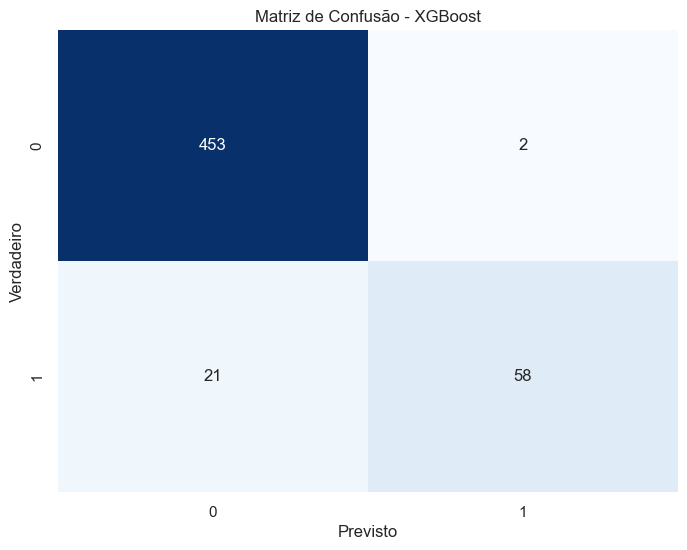

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Converter variáveis categóricas em numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['International plan', 'Voice mail plan'], drop_first=True)

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_encoded.drop(['Churn','State'], axis=1)
y = df_encoded['Churn']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo XGBoost
model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_xgboost = model_xgboost.predict(X_test)

# Avaliar o desempenho do modelo
accuracy_xgboost = accuracy_score(y_test, y_pred_xgboost)
classification_rep_xgboost = classification_report(y_test, y_pred_xgboost)
conf_matrix_xgboost = confusion_matrix(y_test, y_pred_xgboost)

# Exibir resultados
print(f'Acurácia: {accuracy_xgboost:.2f}')
print('Relatório de Classificação:\n', classification_rep_xgboost)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - XGBoost')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()


Epoch 1/20
54/54 [==============================] - 1s 5ms/step - loss: 0.4158 - accuracy: 0.8434 - val_loss: 0.3295 - val_accuracy: 0.8735
Epoch 2/20
54/54 [==============================] - 0s 2ms/step - loss: 0.3026 - accuracy: 0.8827 - val_loss: 0.2862 - val_accuracy: 0.8876
Epoch 3/20
54/54 [==============================] - 0s 2ms/step - loss: 0.2580 - accuracy: 0.9038 - val_loss: 0.2639 - val_accuracy: 0.8993
Epoch 4/20
54/54 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9196 - val_loss: 0.2588 - val_accuracy: 0.9063
Epoch 5/20
54/54 [==============================] - 0s 2ms/step - loss: 0.2077 - accuracy: 0.9255 - val_loss: 0.2482 - val_accuracy: 0.9133
Epoch 6/20
54/54 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9326 - val_loss: 0.2470 - val_accuracy: 0.9180
Epoch 7/20
54/54 [==============================] - 0s 2ms/step - loss: 0.1766 - accuracy: 0.9331 - val_loss: 0.2788 - val_accuracy: 0.9110
Epoch 8/20
54/54 [==

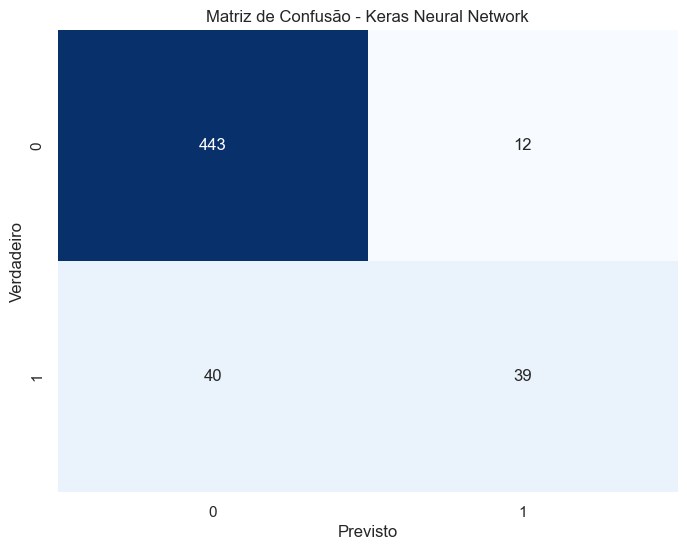

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Converter variáveis categóricas em numéricas usando one-hot encoding
df_encoded = pd.get_dummies(df, columns=['International plan', 'Voice mail plan'], drop_first=True)

# Separar as variáveis independentes (X) e a variável dependente (y)
X = df_encoded.drop(['Churn','State'], axis=1)
y = df_encoded['Churn']



# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar as variáveis
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar uma rede neural simples
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compilar o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Avaliar o modelo no conjunto de teste
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba > 0.5).astype(int)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Exibir resultados
print(f'Acurácia: {accuracy:.2f}')
print('Relatório de Classificação:\n', classification_rep)

# Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Keras Neural Network')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()
